## **LSTM**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.datasets import imdb
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras_preprocessing.sequence import pad_sequences

In [ ]:
# TOTAL TOP WORDS WE WANT
top_words = 5000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words = top_words)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
print(f"SHAPE OF X_train = {X_train.shape} and Y_train = {Y_train.shape}")
print(f"SHAPE OF X_test = {X_test.shape} and Y_test = {Y_test.shape}")

SHAPE OF X_train = (25000,) and Y_train = (25000,)
SHAPE OF X_test = (25000,) and Y_test = (25000,)


In [ ]:
max_review_length = 600
X_train = pad_sequences(X_train, max_review_length)
X_test = pad_sequences(X_test, max_review_length)

In [ ]:
print(f"SHAPE OF X_train = {X_train.shape} and Y_train = {Y_train.shape}")
print(f"SHAPE OF X_test = {X_test.shape} and Y_test = {Y_test.shape}")

SHAPE OF X_train = (25000, 600) and Y_train = (25000,)
SHAPE OF X_test = (25000, 600) and Y_test = (25000,)


In [ ]:
embedding_vector_length = 64

In [ ]:
model = Sequential([
    Embedding(top_words + 1, embedding_vector_length, input_length=max_review_length),
    LSTM(500),
    Dense(50, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()
# plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
h = model.fit(X_train, Y_train, epochs=10, batch_size=100)

Epoch 1/10
250/250 [==============================] - 47s 161ms/step - loss: 0.5984 - accuracy: 0.6830
Epoch 2/10
250/250 [==============================] - 42s 167ms/step - loss: 0.4757 - accuracy: 0.7755
Epoch 3/10
250/250 [==============================] - 43s 172ms/step - loss: 0.5764 - accuracy: 0.6880
Epoch 4/10
250/250 [==============================] - 44s 175ms/step - loss: 0.3600 - accuracy: 0.8488
Epoch 5/10
250/250 [==============================] - 44s 178ms/step - loss: 0.3202 - accuracy: 0.8658
Epoch 6/10
250/250 [==============================] - 45s 180ms/step - loss: 0.2354 - accuracy: 0.9054
Epoch 7/10
250/250 [==============================] - 45s 180ms/step - loss: 0.1871 - accuracy: 0.9270
Epoch 8/10
250/250 [==============================] - 45s 179ms/step - loss: 0.1589 - accuracy: 0.9394
Epoch 9/10
250/250 [==============================] - 45s 180ms/step - loss: 0.1386 - accuracy: 0.9477
Epoch 10/10
250/250 [==============================] - 45s 179ms/step - l

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("ACCURACY ON TESTING DATA:", round(accuracy, 3))

782/782 [==============================] - 23s 28ms/step - loss: 0.3794 - accuracy: 0.8724
ACCURACY ON TESTING DATA: 0.872


In [ ]:
Y_pred = model.predict(X_test)

782/782 [==============================] - 21s 26ms/step


In [ ]:
Y_test = [i for i in Y_test]

In [ ]:
Y_pred = [round(i[0]) for i in Y_pred]

In [ ]:
incorr = 0
for i in range(len(Y_pred)):
    if Y_pred[i] != Y_test[i]:
        incorr += 1

print(f"WRONGLY PREDICTED = {incorr}/{len(Y_pred)}")

WRONGLY PREDICTED = 3191/25000


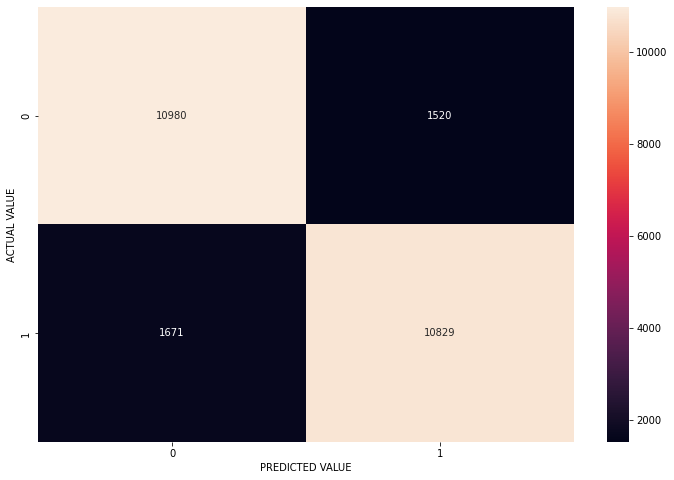

In [ ]:
confuse_mat = tf.math.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(confuse_mat, annot = True, fmt = 'd')
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()